In [1]:
# 손 글씨가 아닌 옷과 신발 등의 흑백 이미지로서 mnist보다는 좀 더 어려운 문제
# 데이터 불러오기 및 확인

import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print(x_train.shape, t_train.shape, '\n')
print(x_test.shape, t_test.shape, '\n')

print(t_train)
print(t_test)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) 

(10000, 28, 28) (10000,) 

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


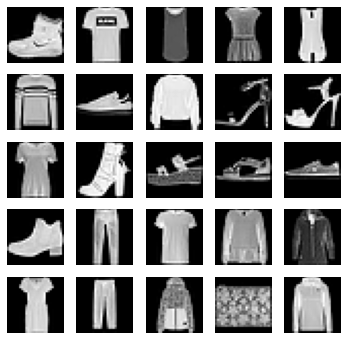

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
    
plt.show()

In [4]:
# 데이터 전처리

x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답에 대한 원핫인코딩 수행하지 않는게 차이점

In [6]:
# 모델 구축 및 컴파일
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 원핫인코딩 수행하지 않기 때문에 sparse_categorical_crossentropy 방식으로
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 1s 786us/step - loss: 0.6884 - accuracy: 0.7614 - val_loss: 0.4681 - val_accuracy: 0.8317
Epoch 2/30
1313/1313 [==============================] - 1s 639us/step - loss: 0.4119 - accuracy: 0.8541 - val_loss: 0.3825 - val_accuracy: 0.8653
Epoch 3/30
1313/1313 [==============================] - 1s 633us/step - loss: 0.3535 - accuracy: 0.8732 - val_loss: 0.3684 - val_accuracy: 0.8659
Epoch 4/30
1313/1313 [==============================] - 1s 656us/step - loss: 0.3271 - accuracy: 0.8810 - val_loss: 0.3831 - val_accuracy: 0.8620
Epoch 5/30
1313/1313 [==============================] - 1s 685us/step - loss: 0.3054 - accuracy: 0.8886 - val_loss: 0.3447 - val_accuracy: 0.8759
Epoch 6/30
1313/1313 [==============================] - 1s 641us/step - loss: 0.2893 - accuracy: 0.8931 - val_loss: 0.3415 - val_accuracy: 0.8780
Epoch 7/30
1313/1313 [==============================] - 1s 638us/step - loss: 0.2845 - accuracy: 0.8959 - val_loss: 0.3308 -

In [8]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 387us/step - loss: 0.4273 - accuracy: 0.8825


[0.4273127317428589, 0.8824999928474426]

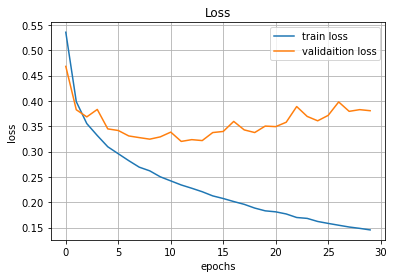

In [9]:
# 손실
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validaition loss')
plt.legend(loc='best')
plt.show()

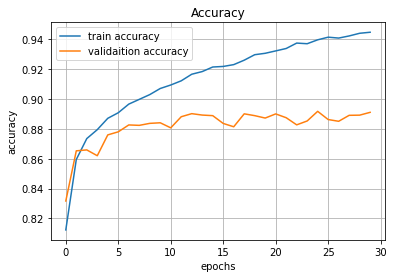

In [10]:
# 정확도
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validaition accuracy')
plt.legend(loc='best')
plt.show()

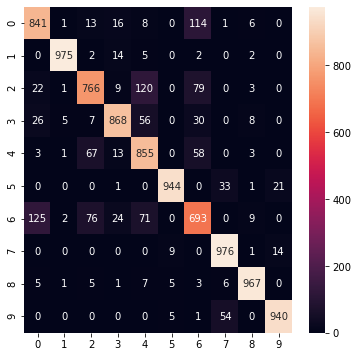

In [12]:
# 혼동행렬: 어떤 데이터를 잘 맞추고, 어떤 데이터를 어려워 하는지 확인
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test) # 테스트 입력데이터에 대한 prediction 실행, 
cm = confusion_matrix(t_test, np.argmax(predicted_value, axis=-1)) # 테스트데이터 정답과 비교, 원핫인코딩이 아니기 때문에 argmax 사용하지 않음, 정답은 10진수로 표현

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [15]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))

[[841   1  13  16   8   0 114   1   6   0]
 [  0 975   2  14   5   0   2   0   2   0]
 [ 22   1 766   9 120   0  79   0   3   0]
 [ 26   5   7 868  56   0  30   0   8   0]
 [  3   1  67  13 855   0  58   0   3   0]
 [  0   0   0   1   0 944   0  33   1  21]
 [125   2  76  24  71   0 693   0   9   0]
 [  0   0   0   0   0   9   0 976   1  14]
 [  5   1   5   1   7   5   3   6 967   0]
 [  0   0   0   0   0   5   1  54   0 940]]


label = 0	(841/1000)	accuracy = 0.841
label = 1	(975/1000)	accuracy = 0.975
label = 2	(766/1000)	accuracy = 0.766
label = 3	(868/1000)	accuracy = 0.868
label = 4	(855/1000)	accuracy = 0.855
label = 5	(944/1000)	accuracy = 0.944
label = 6	(693/1000)	accuracy = 0.693
label = 7	(976/1000)	accuracy = 0.976
label = 8	(967/1000)	accuracy = 0.967
label = 9	(940/1000)	accuracy = 0.940


In [18]:
# 정답 및 예측값 분포 확인

label_distribution = np.zeros(10)
prediction_distribution = np.zeros(10)

print(predicted_value.shape)

for idx in range(len(t_test)):
    label = int(t_test[idx])
    label_distribution[label] = label_distribution[label] + 1
    prediction = int(np.argmax(predicted_value[idx]))
    prediction_distribution[prediction] = prediction_distribution[prediction] + 1
    
print(label_distribution)
print(prediction_distribution)

(10000, 10)
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
[1022.  986.  936.  946. 1122.  963.  980. 1070. 1000.  975.]
